# Lab 05 : Problem Solving

This lab involves a more open-ended study of a system. Obtaining a solution will require several numerical techniques we have encountered so far, including integration, solving differential equations, and optimization.

## Initialization

As always you should add initialization to the top of your notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.interpolate as interp
import scipy.optimize as opt
from scipy.signal import find_peaks
import scipy as sp
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['ytick.minor.visible'] =  True
plt.rcParams['axes.grid'] =  True

We will put into practice a number of ideas we have learned.  Here you are given a problem you should be able to solve using the numerical methods covered in the course so far. It will be your job to figure out how to solve the problem, *clearly document* your solution, and implement it.  You should use this lab as an opportunity to

1. further develop familiarity with tools and methods from earlier assignments,
2. practice documenting your code, and 
3. develop your problem solving skills.

That being said, you should not spend too much time in a rut; ask for help if you get stuck!

The Korteweg–de Vries (KdV) equation approximately describes the amplitude of waves in certain one-dimensional systems, for example the height of water waves in a shallow trough.  There is a class of static solutions to this equation where waves will hold their shape while the system is not disrupted.  In the real world, the KdV equation includes time dependence - a more difficult problem we will not examine yet.  However, you have likely seem some examples of static wave configurations in flowing water, such as stationary ripples in a creek or stream.  Extreme examples of this are even [surfable](https://www.youtube.com/watch?v=g6f8oLu8t8M)!

The KdV equation for the height of a wave, $h(x)$, as a function of position along a trough, $x$, is given by

$$ \frac{\mathrm{d}^3h(x)}{\mathrm{d}x^3} + 6 h(x) \frac{\mathrm{d}h(x)}{\mathrm{d}x} = 0. $$

Your goals are as follows:

1. Solve the differential equation in the range $x=0$ to $x=16$ subject to the initial conditions at $x=0$
$$ h = 0.2, \quad \frac{\mathrm{d}h}{\mathrm{d}x} = 0, \quad \frac{\mathrm{d}^2 h}{\mathrm{d}x^2} = 0.1.$$
2. Produce a nice plot of the results, $h(x)$ vs $x$.
3. You will notice that the resulting function seems periodic. What is the period of the oscillations of this function? Here the period means the $x$ distance between adjacent maxima or minima.
4. Determine the minimim, maximum, and average wave height. Note that the average is not necessarily the average of the min and the max. Print these results.
5. Provide an estimate for uncertainty in your calculation of the average wave height. This estimate should account for error introduced during different steps of the calculation.

Below, provide documentation for your solution technique.  Clearly describe the necessary ingredients and solution process *without* using code. Document your solution using Markdown and LaTeX as needed.

### Required Parameters
h(0) <br>
$\frac{dh(0)}{dx}$ <br>
$\frac{d^2h(0)}{dx^2}$ <br>

### Solution Technique

You are able to rearrange the 3rd order non-linear ODE into three 1st order non-linear ODE's
where

$h = \frac{dh}{dx}$

$\frac{dh}{dx} = \frac{d^2h}{dx^2}$

$\frac{d^2h}{dx^2} = -6*h*\frac{dh}{dx}$

This can then be solved normally by integrate.solve_ivp given the initial conditions described above.

Next provide the code implementing your solution.

In [2]:
def ode(t, y):
    """Define the 3rd order ODE we want to solve"""
    y0 = y[0]
    y1 = y[1]
    y2 = y[2]
    
    f0 = y1
    f1 = y2
    f2 = -6*y0*y1
    
    return np.array([f0, f1, f2], float)
    
y0 = [0.2, 0, 0.1]
traj = integ.solve_ivp(ode, (0,16), y0, vectorized=True, rtol=1.0e-10, atol=1.0e-10)

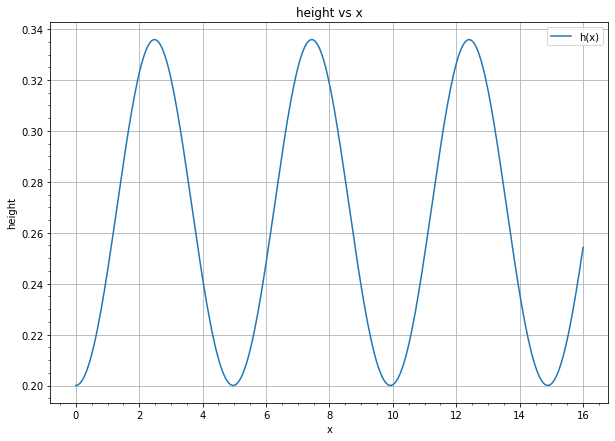

In [3]:
plt.plot(traj.t, traj.y[0], label='h(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('height')
plt.title('height vs x')
plt.show()

In [4]:
# Solve for period
peaks, _ = find_peaks(traj.y[0])

period = traj.t[peaks[1]] - traj.t[peaks[0]]
print(f'Period is {period}')

Period is 4.9553430306755715


In [5]:
# Determine the minimim, maximum, and average wave height.
traj = integ.solve_ivp(ode, (0,100), y0, vectorized=True, rtol=1.0e-10, atol=1.0e-10)
peaks, _ = find_peaks(traj.y[0])
troughs, _ = find_peaks(-traj.y[0])
avg_max = np.average([traj.y[0][i] for i in peaks])
avg_min = np.average([traj.y[0][i] for i in troughs])
avg = np.average(traj.y[0][peaks[0]:peaks[-1]])
print(f'Average max is {avg_max}')
print(f'Average min is {avg_min}')
print(f'Average wave height is {avg}')

Average max is 0.33587786615169235
Average min is 0.20001740906978158
Average wave height is 0.27078434414844604


In [6]:
# Provide an estimate for uncertainty in your calculation of the average wave height.
std = np.std(traj.y[0][peaks[0]:peaks[-1]])
print(f'Standard deviation is {std}')

Standard deviation is 0.04735858938666285


## Member Participation

See Lab 1 for instructions on turning in labs. In the following cell enter the names for each student in the group who partcipated in this lab.

Ahlers, Chung, Villegas